In [1]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Italy.csv")
df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,G. Chiellini,33,Italy,89,89,27000000.0,215000.0,1841,Left,4.0,...,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M,Defender,31-35
1,L. Insigne,27,Italy,88,88,62000000.0,165000.0,2017,Right,3.0,...,24.0,22.0,8.0,4.0,14.0,9.0,10.0,€105.4M,Attacker,26-30
2,G. Buffon,40,Italy,88,88,4000000.0,77000.0,1334,Right,4.0,...,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M,Goalkeeper,36-40
3,C. Immobile,28,Italy,87,87,52000000.0,115000.0,2009,Right,3.0,...,33.0,32.0,6.0,8.0,15.0,12.0,6.0,€88.4M,Attacker,26-30
4,M. Verratti,25,Italy,86,89,55000000.0,135000.0,2149,Right,3.0,...,83.0,80.0,12.0,12.0,15.0,15.0,10.0,€105.9M,Midfielder,22-25


In [3]:
df['Position'].value_counts()

GK     92
CM     90
CB     82
ST     72
LB     55
RB     38
LW     32
LCB    27
RM     27
CAM    25
RCB    24
RW     19
LCM    19
LM     18
RS     17
RCM    16
CDM    16
LS     16
CF      5
RDM     4
0       3
RWB     2
RF      1
LDM     1
LWB     1
Name: Position, dtype: int64

In [4]:
ageBins = [15, 21, 25, 30, 35, 40, 45]
ranges = ['16-21','22-25','26-30','31-35','36-40','41-45']
df['Age_Ranges'] = pd.cut(df['Age'], bins = ageBins, labels = ranges)
df['Age_Ranges'].value_counts()

26-30    225
22-25    200
16-21    145
31-35    110
36-40     22
41-45      0
Name: Age_Ranges, dtype: int64

In [5]:
maxEarners= df[['Name','Value', 'Wage']].nlargest(11,'Wage', keep = 'first')
maxEarners = maxEarners.set_index('Name')
maxEarners.head()

,Value,Wage
Name,,
G. Chiellini,27000000.0,215000.0
L. Insigne,62000000.0,165000.0
L. Bonucci,30000000.0,160000.0
Jorginho,38000000.0,155000.0
M. Verratti,55000000.0,135000.0


Text(0, 0.5, 'Wage')

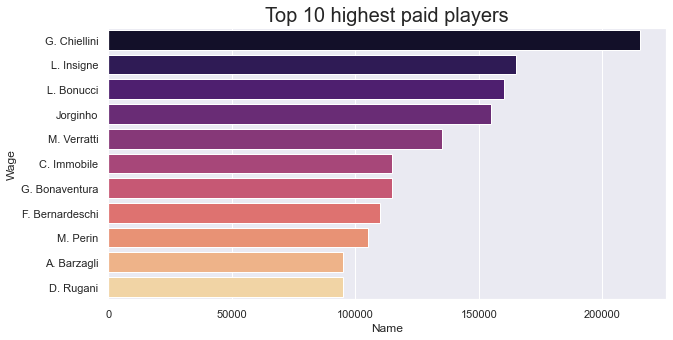

In [6]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = maxEarners['Wage'], y = maxEarners.index,  palette = 'magma')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

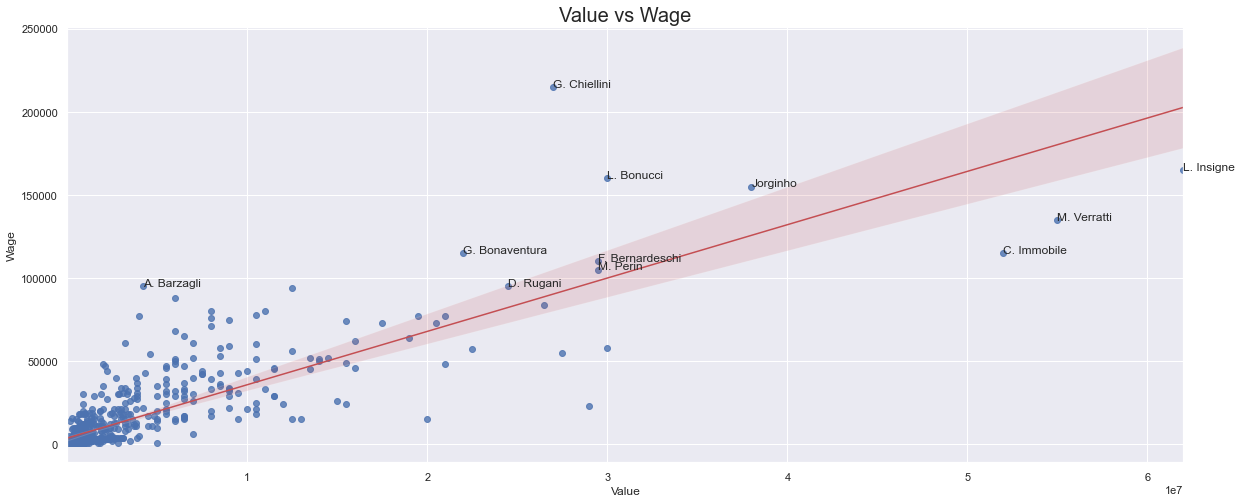

In [7]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = df,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (maxEarners['Value'][i],maxEarners['Wage'][i]))

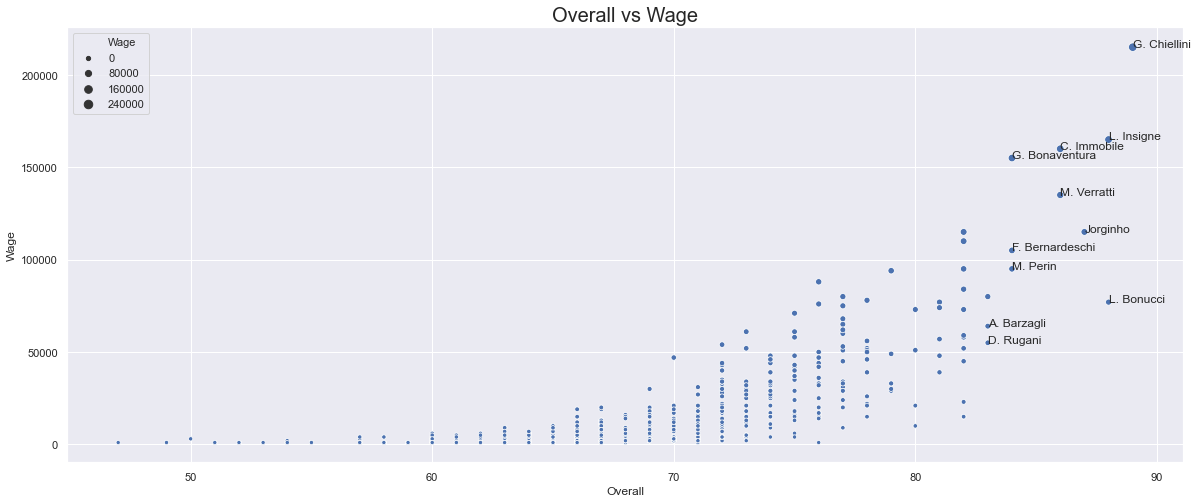

In [8]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Overall', y = 'Wage' , data = df, size='Wage')
plt.title('Overall vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (df['Overall'][i],df['Wage'][i]))

Text(0.5, 1.0, 'Wage vs Position Class')

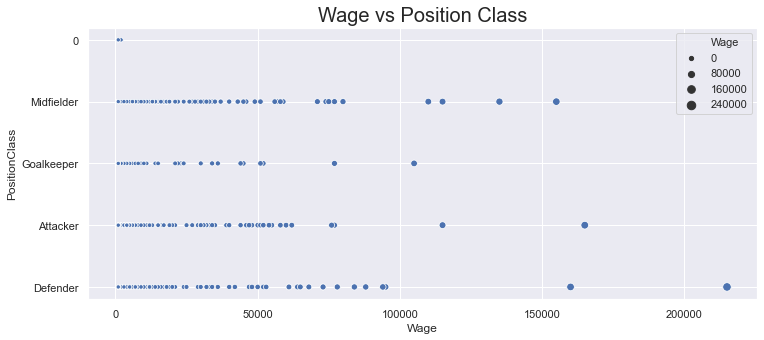

In [9]:
plt.figure(figsize=(12,5))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Wage', y = 'PositionClass' , data = df,size='Wage')
plt.title('Wage vs Position Class', fontsize = 20)

In [10]:
cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Skill Moves','Dribbling', 'Curve',
      'FKAccuracy', 'LongPassing', 'BallControl', 'Agility', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
      'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Reactions', 'Aggression',
      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle',
      'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(cols):
    print('Best {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmax()][0]))
    i += 1

Best Crossing : L. Insigne
Best Finishing : C. Immobile
Best HeadingAccuracy : L. Pavoletti
Best ShortPassing : M. Verratti
Best Volleys : C. Immobile
Best Skill Moves : F. Bernardeschi
Best Dribbling : L. Insigne
Best Curve : S. Giovinco
Best FKAccuracy : S. Giovinco
Best LongPassing : M. Verratti
Best BallControl : L. Insigne
Best Agility : C. Galano
Best Acceleration : L. Insigne
Best SprintSpeed : C. Galano
Best Agility : C. Galano
Best Reactions : C. Immobile
Best Balance : M. Verratti
Best ShotPower : M. Balotelli
Best Jumping : G. Pazzini
Best Stamina : J. Dezi
Best Strength : A. Cerri
Best LongShots : F. Quagliarella
Best Reactions : C. Immobile
Best Aggression : G. Chiellini
Best Interceptions : L. Bonucci
Best Positioning : C. Immobile
Best Vision : L. Insigne
Best Penalties : M. Balotelli
Best Composure : M. Verratti
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : G. Chiellini
Best GKDiving : G. Buffon
Best GKHandling : G. Buffon
Best GKKic